# Detección de Emociones Usando Machine Learning

### Fundamentos de Inteligencia Artificial

### Castañeda Cruz Alan

### Rodas Bautista Saúl

### 4BM1

In [1]:
# Se importan las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import neattext.functions as nfx

In [2]:
# Se carga el dataset
df = pd.read_csv("emotion_dataset_2.csv")

Previsualización del conjunto de datos

In [3]:
df.head

<bound method NDFrame.head of        Unnamed: 0   Emotion  \
0               0   neutral   
1               1       joy   
2               2   sadness   
3               3       joy   
4               4       joy   
...           ...       ...   
34787       34787  surprise   
34788       34788       joy   
34789       34789     anger   
34790       34790      fear   
34791       34791   sadness   

                                                    Text  \
0                                                 Why ?    
1        Sage Act upgrade on my to do list for tommorow.   
2      ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3       Such an eye ! The true hazel eye-and so brill...   
4      @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   
...                                                  ...   
34787  @MichelGW have you gift! Hope you like it! It'...   
34788  The world didnt give it to me..so the world MO...   
34789                           A man robbed me today .  

In [4]:
df.shape

(34792, 4)

In [5]:
# Tipos de dato
df.dtypes

Unnamed: 0     int64
Emotion       object
Text          object
Clean_Text    object
dtype: object

In [6]:
# Se revisa si hay valores faltantes
df.isnull().sum()

Unnamed: 0      0
Emotion         0
Text            0
Clean_Text    466
dtype: int64

In [7]:
# Se cuenta la cantidad de emociones en el dataset
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

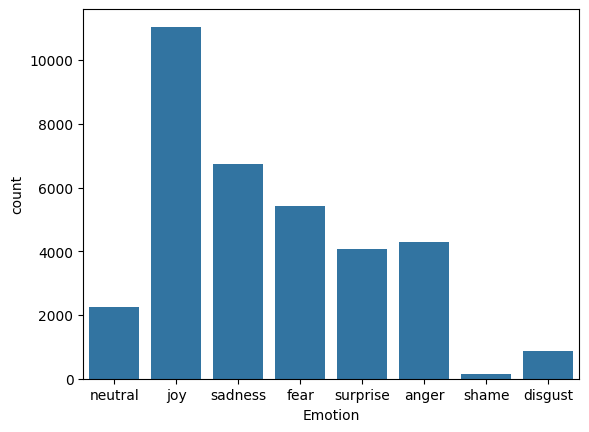

In [8]:
# Graficamos
sns.countplot(x = 'Emotion', data =df )

In [9]:
from textblob import TextBlob

In [10]:
def sentimiento(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        resultado = "Positivo"
    elif sentiment < 0:
        resultado = "Negativo"
    else:
        resultado = "Neutral"
    return resultado

In [11]:
# Prueba de la función
sentimiento("Hello, world!")

'Neutral'

In [12]:
df['Sentiment'] = df ['Text'].apply(sentimiento)

In [13]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text,Sentiment
0,0,neutral,Why ?,NaN,Neutral
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow,Neutral
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,Negativo
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...,Positivo
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...,Neutral


In [14]:
# Comparamos emoción con sentimiento
df.groupby(['Emotion', 'Sentiment']).size()

Emotion   Sentiment
anger     Negativo     1787
          Neutral      1386
          Positivo     1124
disgust   Negativo      325
          Neutral       249
          Positivo      282
fear      Negativo     1535
          Neutral      1843
          Positivo     2032
joy       Negativo     1682
          Neutral      3648
          Positivo     5715
neutral   Negativo      178
          Neutral      1523
          Positivo      553
sadness   Negativo     2630
          Neutral      2127
          Positivo     1965
shame     Negativo       46
          Neutral        50
          Positivo       50
surprise  Negativo      623
          Neutral      1546
          Positivo     1893
dtype: int64

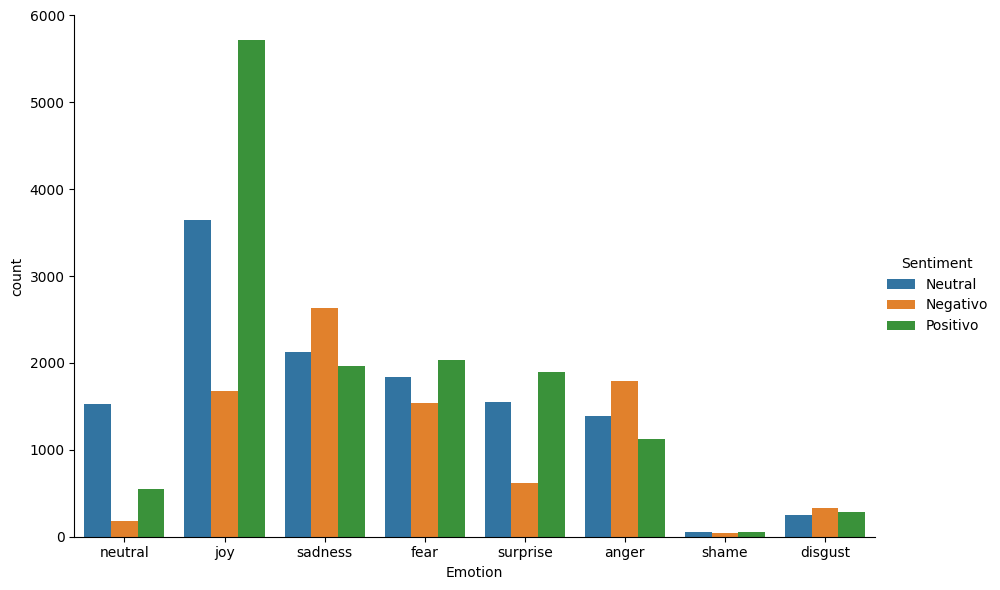

In [15]:
sns.catplot
sns.catplot(x = 'Emotion', hue = 'Sentiment', data = df, kind = 'count', height = 6, aspect = 1.5)

### Extracción de palabras clave
Se busca extraer las palabras más comunes por clase de emoción

In [16]:
from collections import Counter

In [17]:
def extraer_claves(text, num = 50):
    tokens = [token for token in text.split()]
    tokensComunes = Counter(tokens).most_common(num)
    return dict(tokensComunes)

In [18]:
listaEmociones = df ['Emotion'].unique().tolist()

In [19]:
listaEmociones

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [20]:
joyLista = df[df['Emotion'] == 'joy']['Clean_Text'].to_list()

In [21]:
joyLista

['Sage Act upgrade list tommorow',
 'eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness ',
 '  ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang',
 'life  Leopold truly happy : hopes prayers beloved son come fruition ',
 'feeling fail french #fuckfrench',
 'GoodLet  ',
 'fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile',
 'terribly ecstatic dangerous thing ',
 'selected study university',
 'Yeah  ’ ages  ',
 'passed BA exams class results',
 'heard selected fot year university Zambia form Chikola secondary school',
 'Welp time study days',
 'Heading campus rain grad photos',
 'feeling awesome ',
 '  brings  Ive bought Christmas presents trawl loads shops :)',
 'shit pants Pure 100% gravy',
 'life  Leopold

In [22]:
# Documento Joy
joyDoc = ' '.join(map(str, joyLista))

In [23]:
joyDoc

'Sage Act upgrade list tommorow eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness    ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang life  Leopold truly happy : hopes prayers beloved son come fruition  feeling fail french #fuckfrench GoodLet   fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile terribly ecstatic dangerous thing  selected study university Yeah  ’ ages   passed BA exams class results heard selected fot year university Zambia form Chikola secondary school Welp time study days Heading campus rain grad photos feeling awesome    brings  Ive bought Christmas presents trawl loads shops :) shit pants Pure 100% gravy life  Leopold truly happy : hopes prayers beloved son come fruition  Class jamming

In [24]:
# Extracción de palabras clave
joy_Keywords = extraer_claves(joyDoc)

In [25]:
joy_Keywords

{'day': 729,
 'amp': 678,
 'time': 602,
 'Im': 555,
 'work': 509,
 'like': 476,
 'today': 471,
 'tomorrow': 467,
 'Christmas': 453,
 'love': 393,
 'happy': 368,
 'good': 345,
 'night': 332,
 'got': 328,
 ':)': 311,
 'going': 304,
 'home': 302,
 'school': 297,
 'morning': 288,
 '2': 262,
 'joy': 257,
 'life': 251,
 'hours': 251,
 'week': 231,
 'feel': 227,
 'year': 225,
 'days': 208,
 'tonight': 205,
 'long': 204,
 'people': 201,
 'me': 196,
 'great': 194,
 'sleep': 185,
 'new': 181,
 'family': 181,
 's': 180,
 'God': 177,
 'know': 177,
 'hour': 172,
 'friend': 169,
 'felt': 167,
 'cant': 165,
 'it': 162,
 'feeling': 159,
 'RT': 159,
 'friends': 155,
 'think': 148,
 'excited': 145,
 'right': 142,
 'class': 141}

In [26]:
def plotPalabrasComunes(mydict):
    df_01 = pd.DataFrame(mydict.items(), columns = ['token', 'count'])
    plt.figure(figsize=(20,10))
    sns.barplot(x = 'token', y = 'count', data = df_01)
    plt.xticks(rotation=45)
    plt.show()

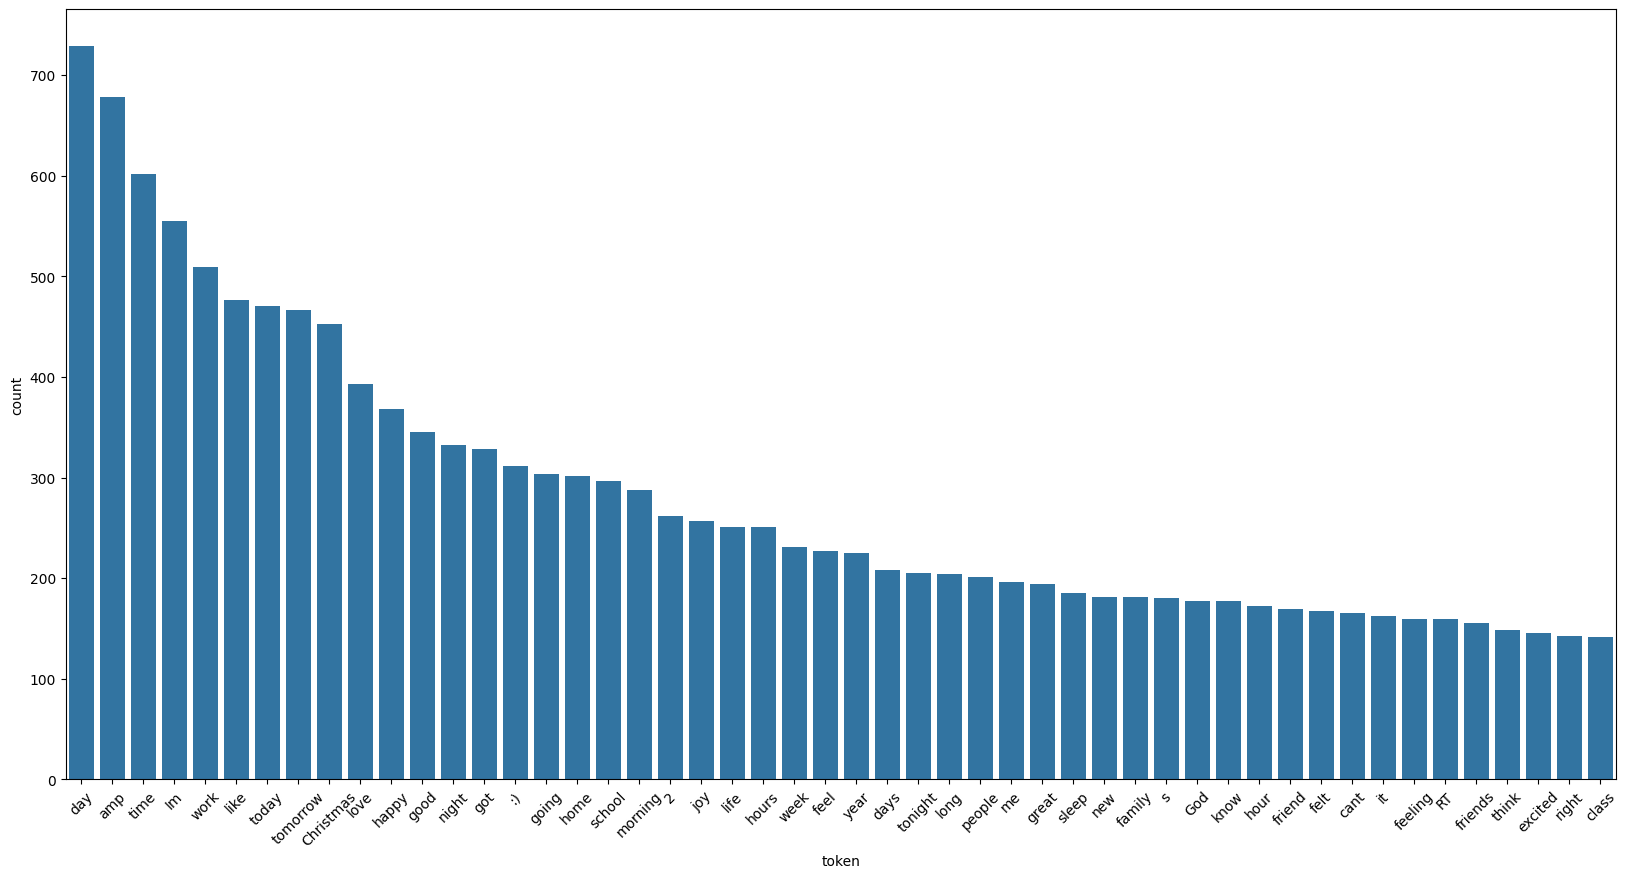

In [27]:
plotPalabrasComunes(joy_Keywords)

In [28]:
# DocNeutral
neutralLista = df[df['Emotion'] == 'neutral']['Clean_Text'].to_list()
neutralDoc = ' '.join(map(str, neutralLista))

# Doc Sadness
sadnessLista = df[df['Emotion'] == 'sadness']['Clean_Text'].to_list()
sadnessDoc = ' '.join(map(str, sadnessLista))

# Doc Fear
fearLista = df[df['Emotion'] == 'fear']['Clean_Text'].to_list()
fearDoc = ' '.join(map(str, fearLista))

# Doc Surprise
surpriseLista = df[df['Emotion'] == 'surprise']['Clean_Text'].to_list()
surpriseDoc = ' '.join(map(str, surpriseLista))

# Doc Anger
angerLista = df[df['Emotion'] == 'anger']['Clean_Text'].to_list()
angerDoc = ' '.join(map(str, angerLista))

# Doc Shame
shameLista = df[df['Emotion'] == 'shame']['Clean_Text'].to_list()
shameDoc = ' '.join(map(str, shameLista))

# Doc Disgust
disgustLista = df[df['Emotion'] == 'disgust']['Clean_Text'].to_list()
disgustDoc = ' '.join(map(str, disgustLista))

In [29]:
neutral_Keywords = extraer_claves(neutralDoc)
sadness_Keywords = extraer_claves(sadnessDoc)
fear_Keywords = extraer_claves(fearDoc)
surprise_Keywords = extraer_claves(surpriseDoc)
anger_Keywords = extraer_claves(angerDoc)
shame_Keywords = extraer_claves(shameDoc)
disgust_Keywords = extraer_claves(disgustDoc)

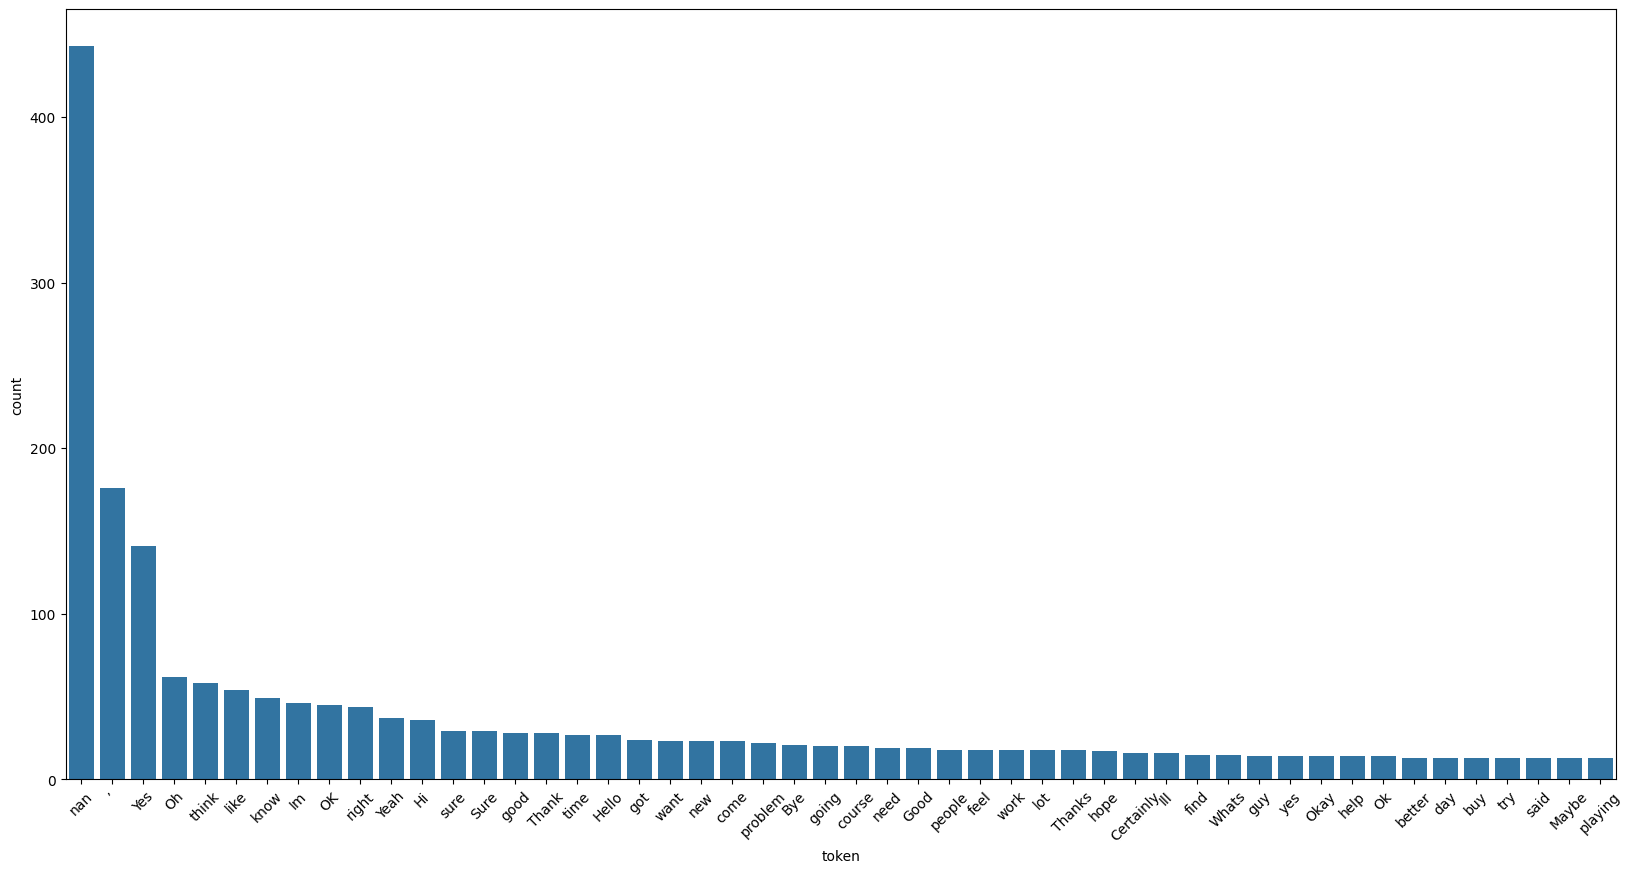

In [30]:
plotPalabrasComunes(neutral_Keywords)


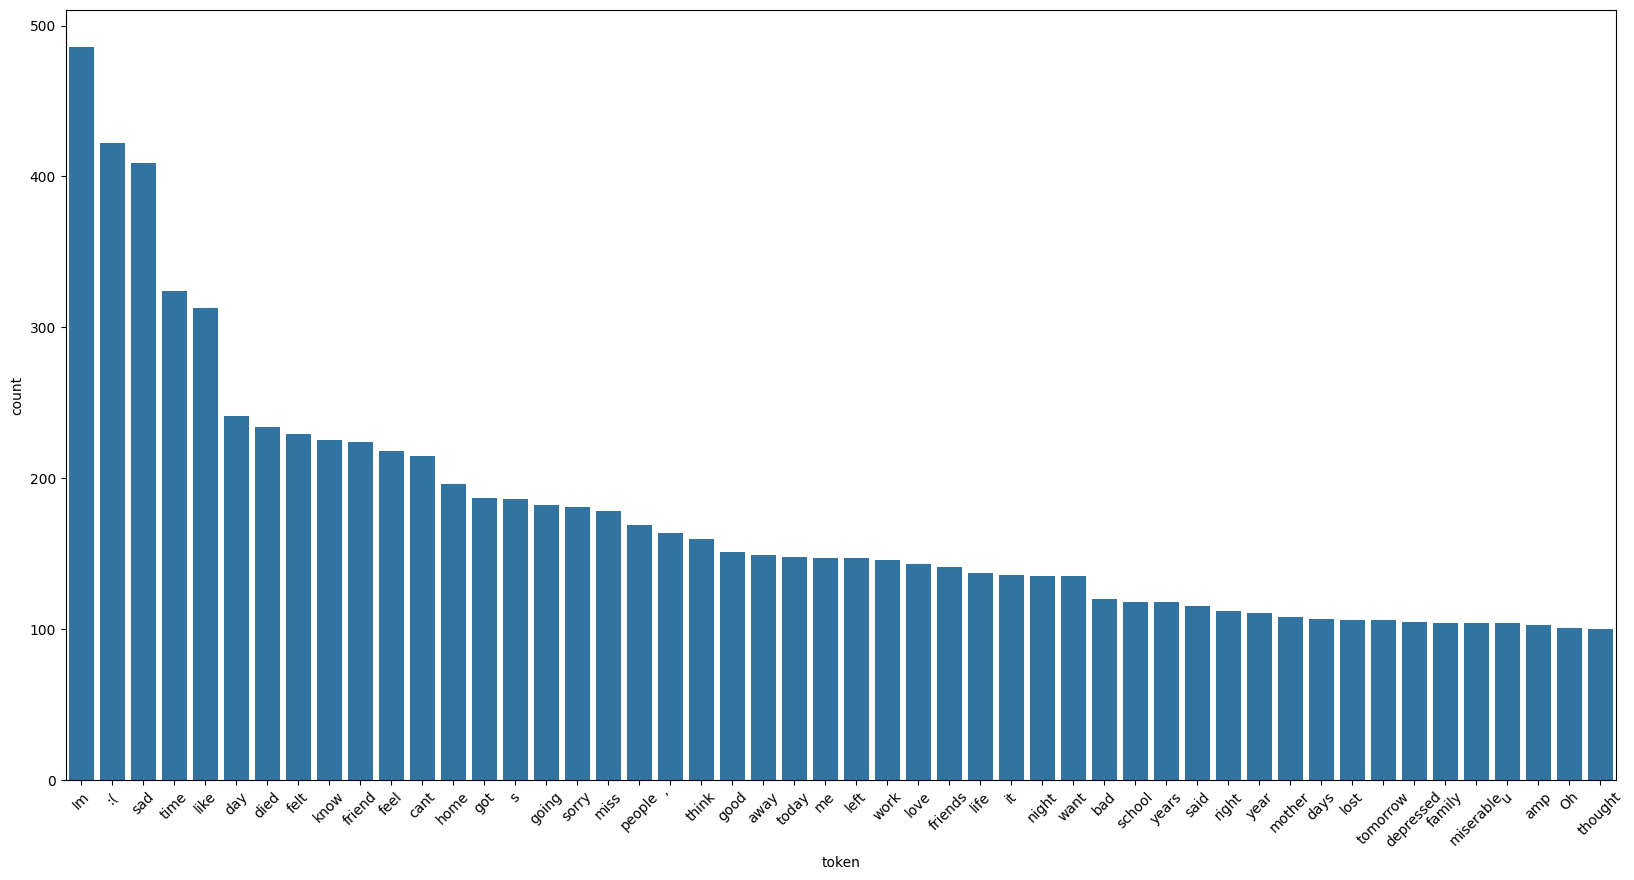

In [31]:
plotPalabrasComunes(sadness_Keywords)


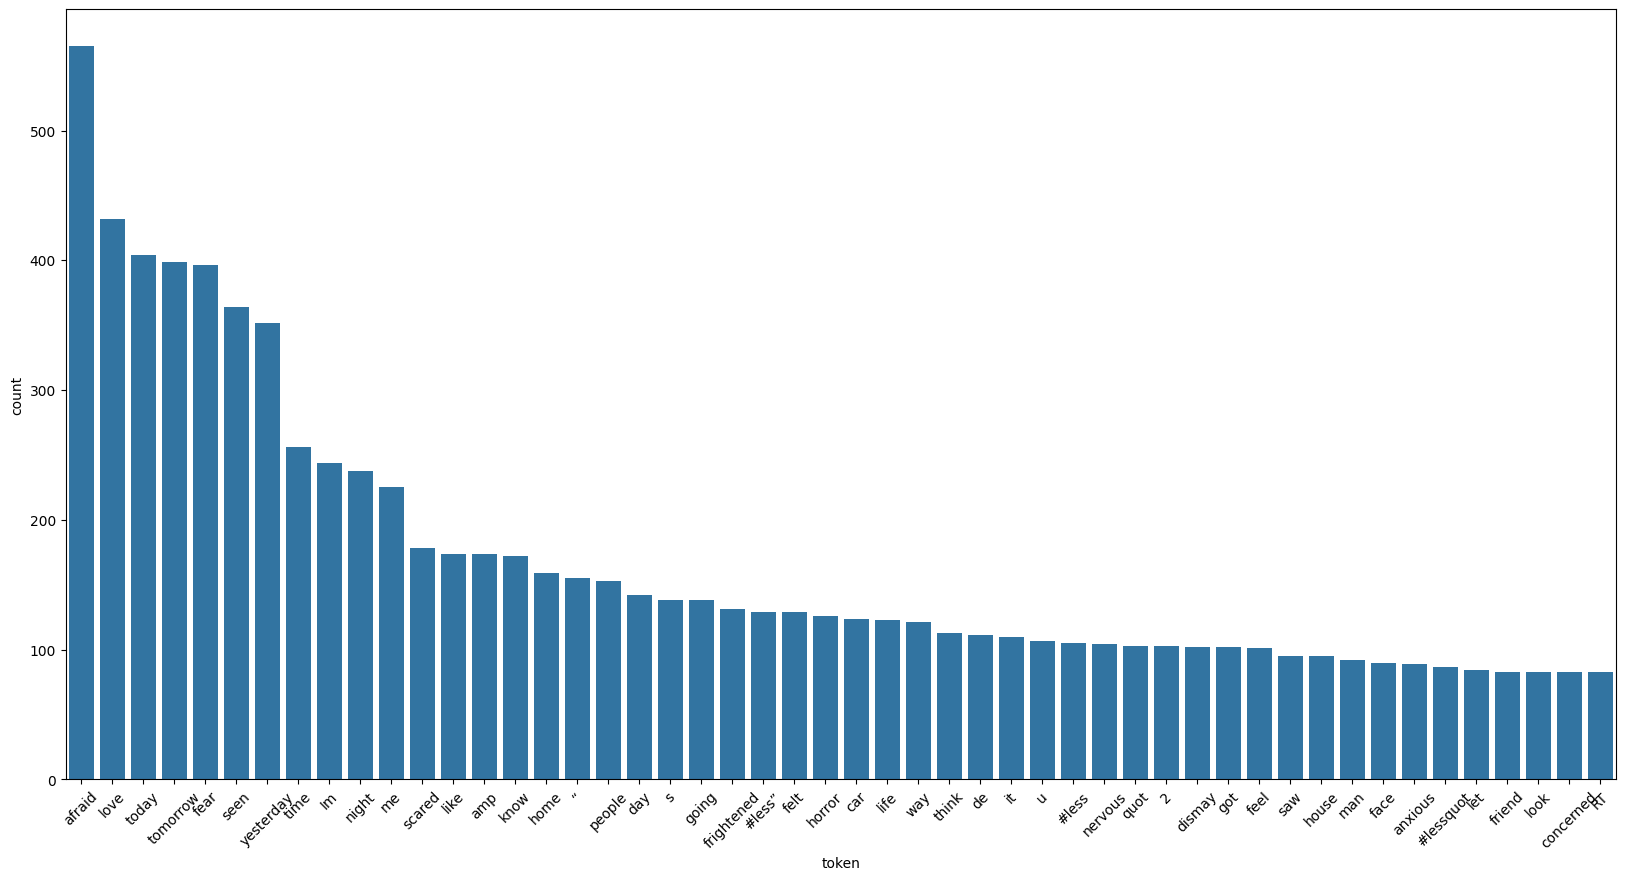

In [32]:
plotPalabrasComunes(fear_Keywords)


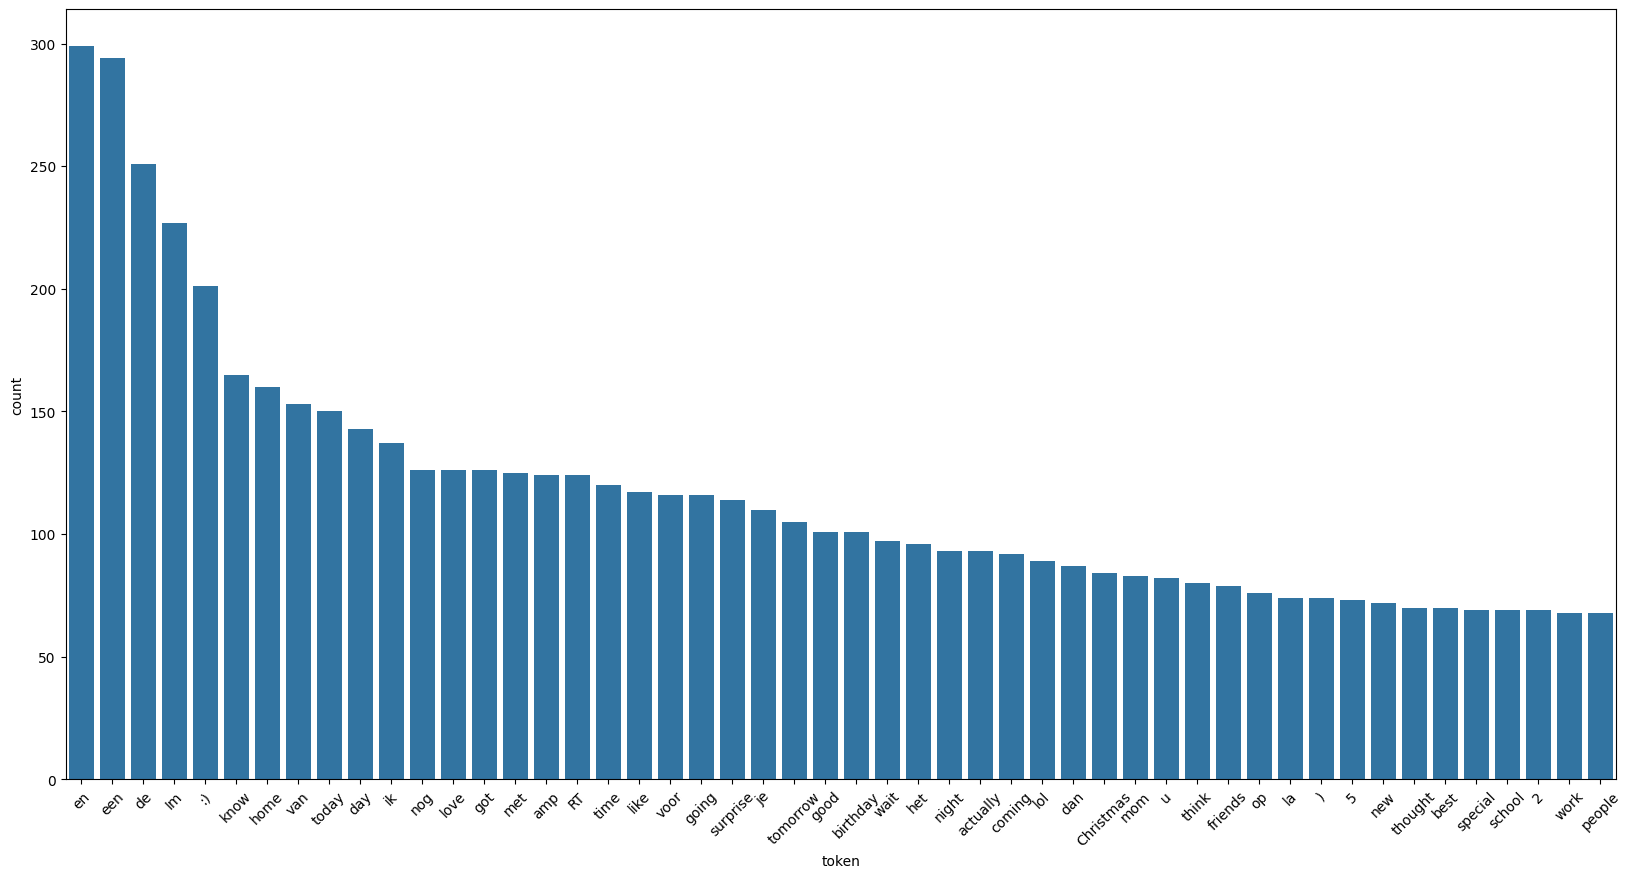

In [33]:
plotPalabrasComunes(surprise_Keywords)


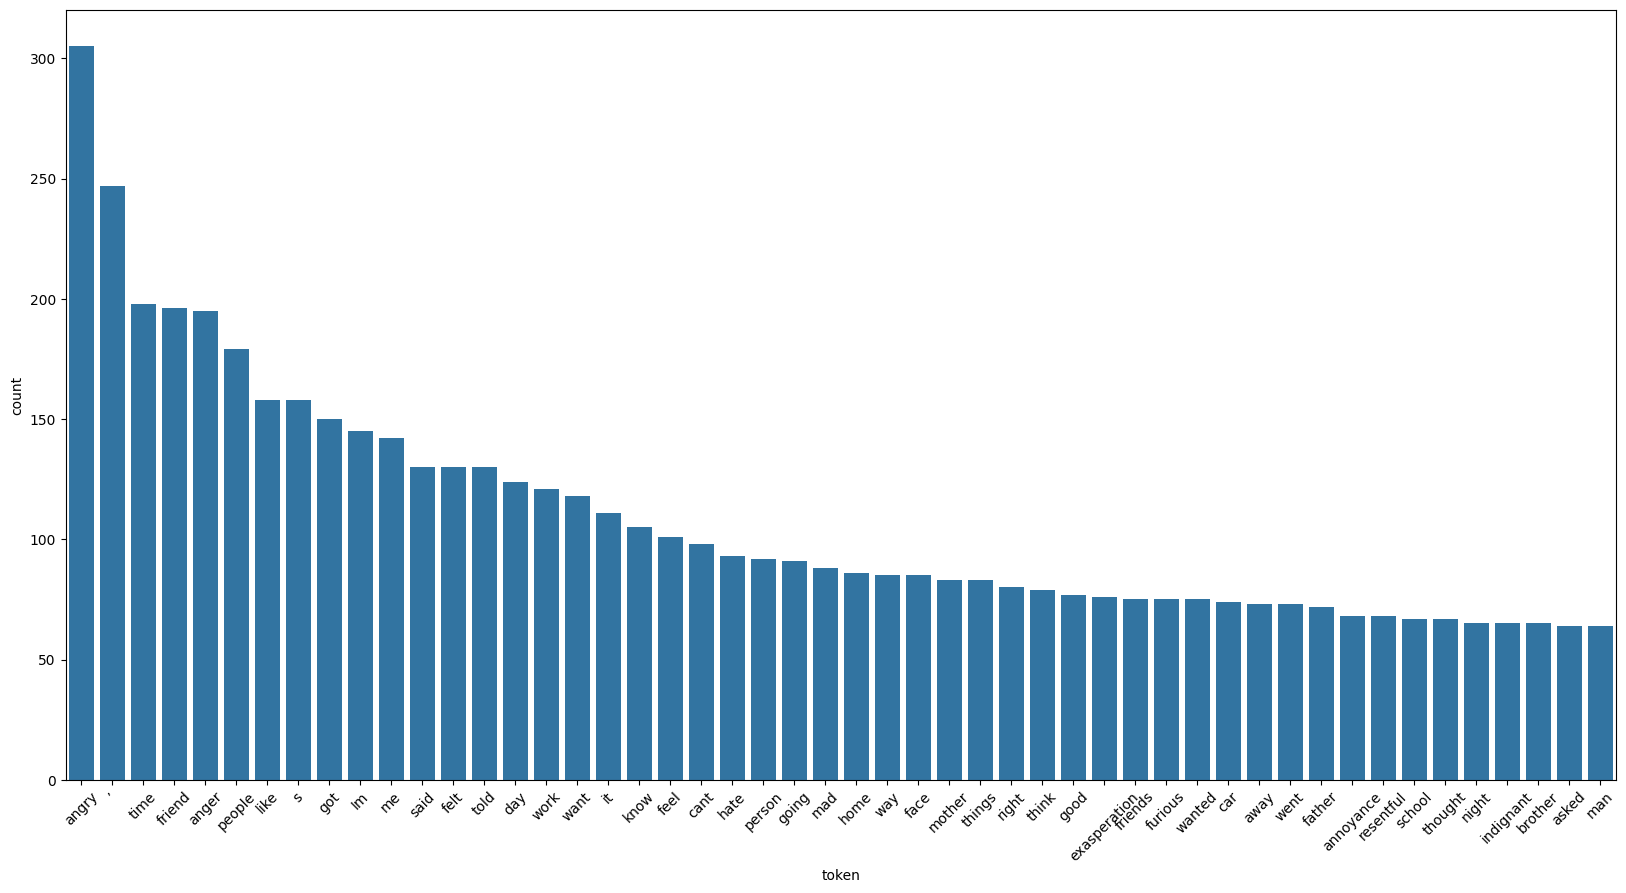

In [34]:
plotPalabrasComunes(anger_Keywords)


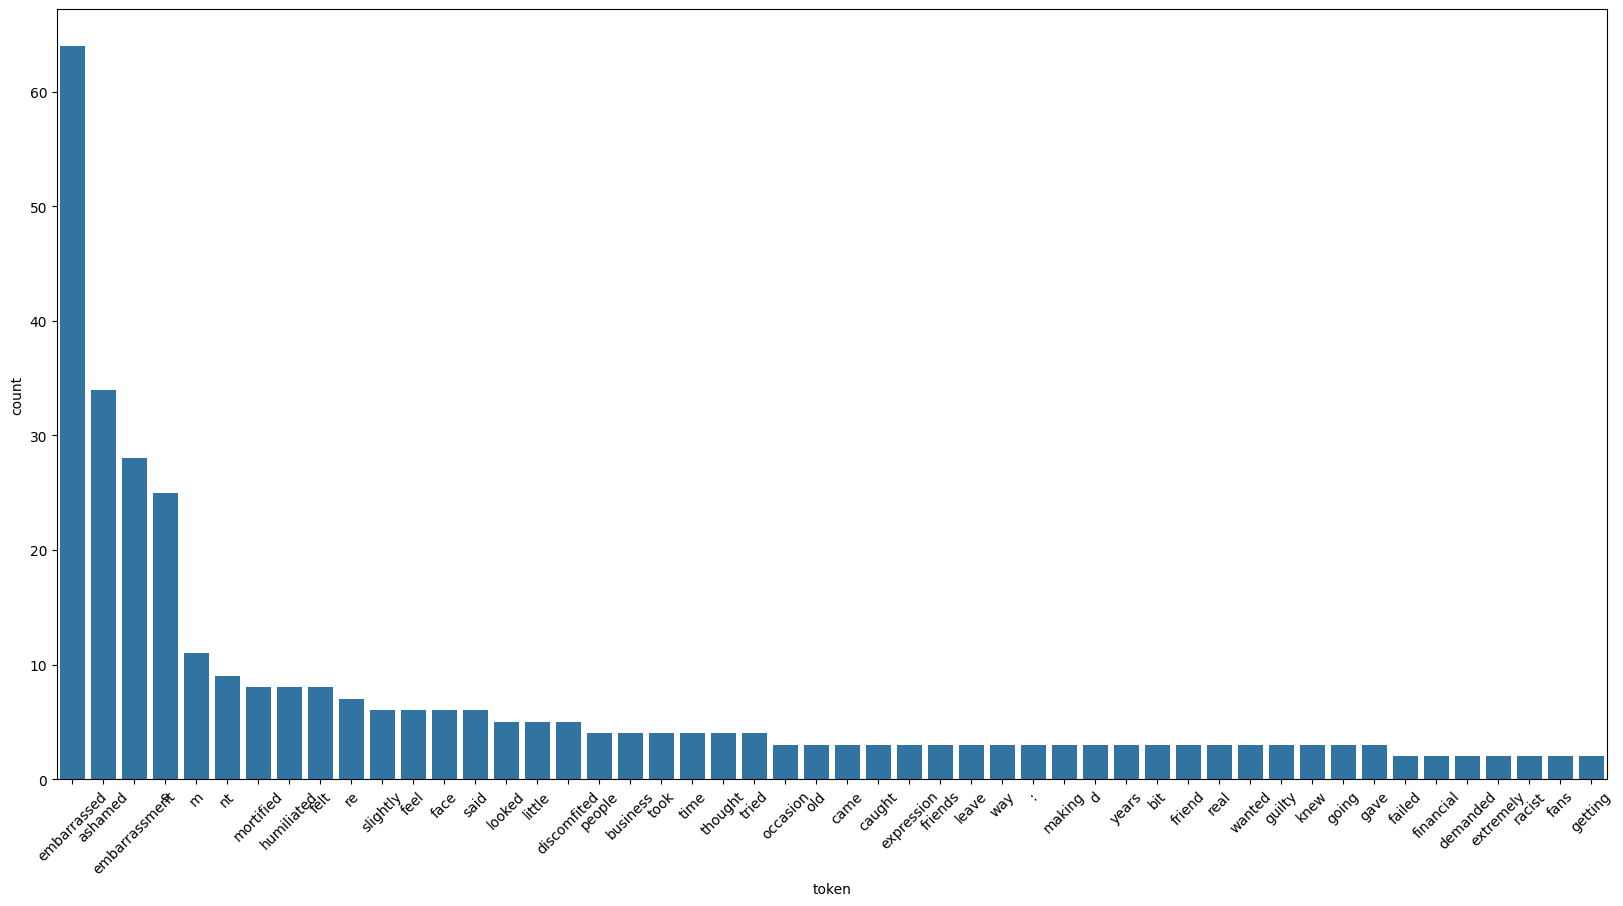

In [35]:
plotPalabrasComunes(shame_Keywords)


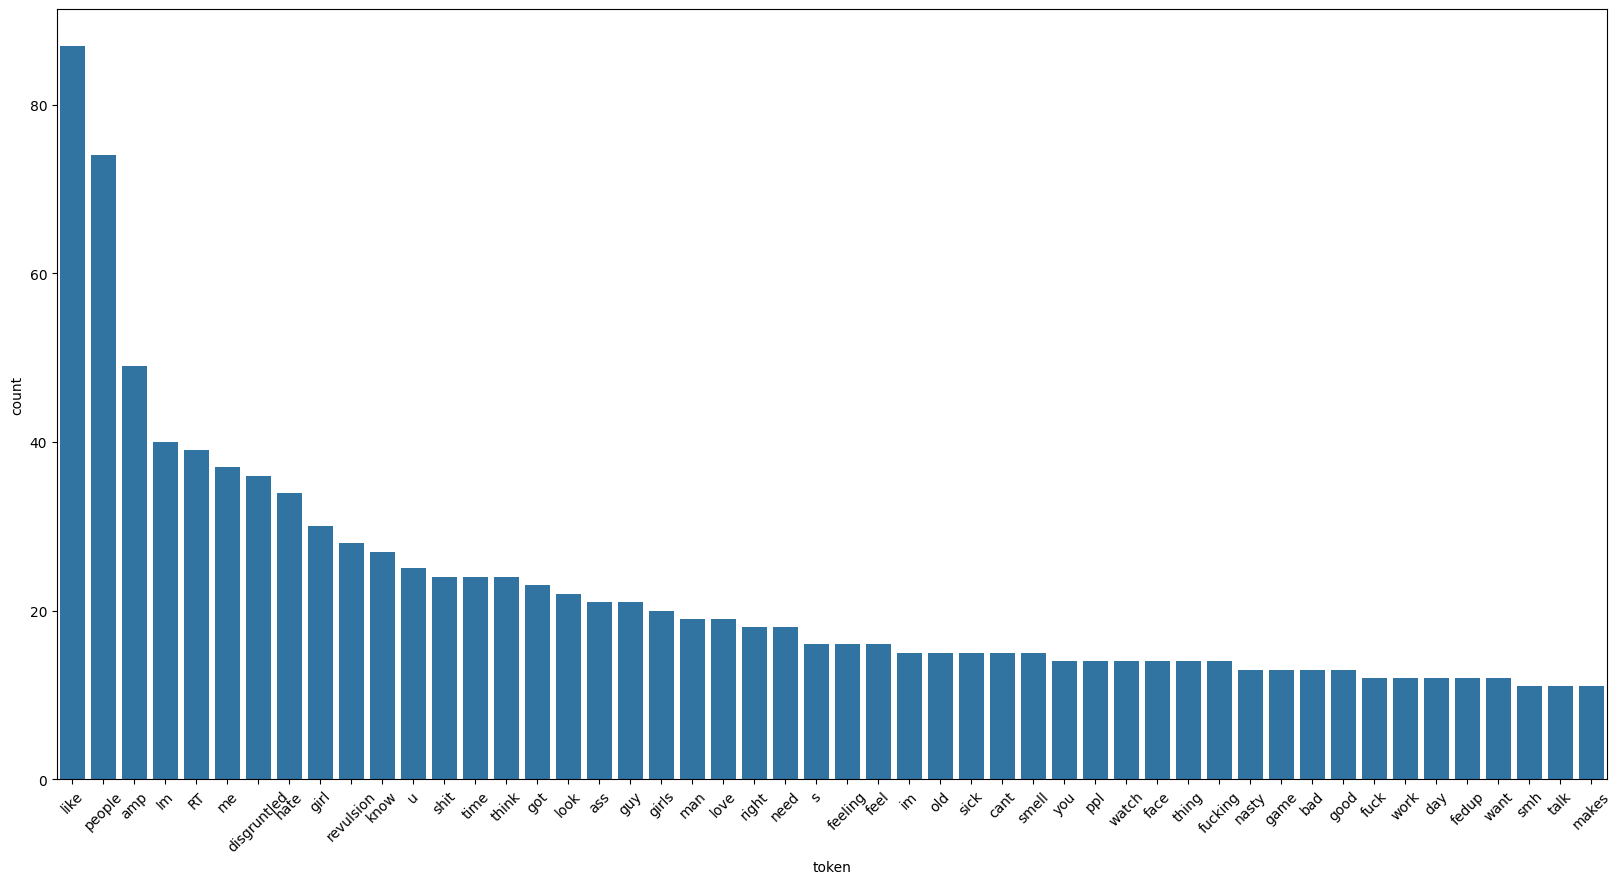

In [36]:
plotPalabrasComunes(disgust_Keywords)

### Machine Learning
Se usa:
+ Naive Bayes
+ Regresión logística

In [37]:
# Se importan las bibliotecas de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Para el vectorizador
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Para las métricas
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [38]:
# Para partir el dataset
from sklearn.model_selection import train_test_split

In [39]:
xFeatures = df['Clean_Text'].fillna('')
yLabels = df['Emotion']

In [40]:
xFeatures

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                            Youu JEALOUSY #Losing YOU
34791                                think baby dream time
Name: Clean_Text, Length: 34792, dtype: object

In [41]:
#Vectorizador
cv = CountVectorizer()
x = cv.fit_transform(xFeatures)

In [42]:
cv.get_feature_names_out()

array(['00', '000', '000ème', ..., 'ღƪ', 'ℕoíʀ', 'ㄒʜℰℳℰ'], dtype=object)

In [43]:
# Partir dataset
xTrain, xTest, yTrain, yTest = train_test_split(x, yLabels, test_size=0.3, random_state=42)

### Construcción del modelo

In [44]:
nv_model = MultinomialNB()
nv_model.fit(xTrain, yTrain)

MultinomialNB()

In [45]:
# Accuracy
# Método 1
nv_model.score(xTest, yTest)

0.5642843456600881

In [46]:
#Predicciones
predYParaNv = nv_model.predict(xTest)

In [47]:
predYParaNv

array(['fear', 'sadness', 'sadness', ..., 'sadness', 'anger', 'sadness'],
      dtype='<U8')

In [48]:
textoEjemplo = ["I want to punch you in the face"]

In [49]:
vect = cv.transform(textoEjemplo).toarray()

In [50]:
# Se hace una predicción
nv_model.predict(vect)

array(['anger'], dtype='<U8')

In [51]:
# Probabilidad porcentual de que la predicción sea correcta
nv_model.predict_proba(vect)

array([[7.94854432e-01, 3.48617625e-05, 4.66275245e-02, 1.02037807e-01,
        2.77534309e-07, 5.42444129e-02, 5.44119659e-09, 2.20067892e-03]])

In [52]:
# Clases para el modelo
nv_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [53]:
np.max(nv_model.predict_proba(vect))

0.7948544316195364

In [54]:
def predecir_emocion(textoEjemplo, modelo):
    vector = cv.transform(textoEjemplo).toarray()
    prediccion = modelo.predict(vector)
    pred_proba = modelo.predict_proba(vector)
    predPorcientoTodos = dict(zip(modelo.classes_, pred_proba[0]))
    print(textoEjemplo)
    print("Predicción: {}, Puntuación de la predicción: {}".format(prediccion[0], np.max(pred_proba)))
    return predPorcientoTodos

In [55]:
predecir_emocion(textoEjemplo, nv_model)

['I want to punch you in the face']
Predicción: anger, Puntuación de la predicción: 0.7948544316195364


{'anger': 0.7948544316195364,
 'disgust': 3.486176250642989e-05,
 'fear': 0.0466275244900214,
 'joy': 0.10203780733041208,
 'neutral': 2.775343091519898e-07,
 'sadness': 0.054244412905463356,
 'shame': 5.4411965893352145e-09,
 'surprise': 0.0022006789165538326}

In [56]:
predecir_emocion(["I want to kill him"], nv_model)

['I want to kill him']
Predicción: anger, Puntuación de la predicción: 0.5236725555930044


{'anger': 0.5236725555930044,
 'disgust': 0.0005694657421440735,
 'fear': 0.10127287416514505,
 'joy': 0.18415137076022303,
 'neutral': 7.441937506443744e-05,
 'sadness': 0.18389207749441308,
 'shame': 7.770779716507651e-07,
 'surprise': 0.006366459792033797}

### Evaluación del modelo

In [57]:
# Clasificación
print(classification_report(yTest, predYParaNv))

              precision    recall  f1-score   support

       anger       0.64      0.49      0.56      1283
     disgust       0.53      0.03      0.06       292
        fear       0.75      0.60      0.67      1645
         joy       0.51      0.86      0.64      3311
     neutral       0.30      0.02      0.04       675
     sadness       0.56      0.54      0.55      2015
       shame       1.00      0.03      0.05        36
    surprise       0.61      0.27      0.38      1181

    accuracy                           0.56     10438
   macro avg       0.61      0.36      0.37     10438
weighted avg       0.57      0.56      0.53     10438



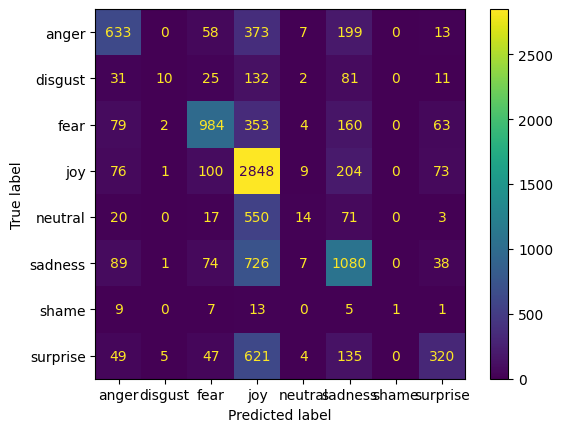

In [58]:
# Matriz de confusión
cm = confusion_matrix(yTest, predYParaNv)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nv_model.classes_)
disp.plot()

### Modelo de regresión logística

In [59]:
lr_model = LogisticRegression()
lr_model.fit(xTrain, yTrain)

c:\Users\Alan Castañeda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
# Accuracy
lr_model.score(xTest, yTest)

0.622341444721211

In [61]:
#Predicción de prueba
predecir_emocion(textoEjemplo, lr_model)

['I want to punch you in the face']
Predicción: anger, Puntuación de la predicción: 0.7164182790793114


{'anger': 0.7164182790793114,
 'disgust': 0.052618222715047076,
 'fear': 0.07831904431281204,
 'joy': 0.0230054557780032,
 'neutral': 0.0017439480541142716,
 'sadness': 0.10822662706042299,
 'shame': 0.0009169487757972277,
 'surprise': 0.018751474224491717}

### Guardar modelos

In [62]:
#import joblib

In [63]:
## Guardar el modelo Naive-Bayes
#modelFile = open("modelo_nv_clasificador_de_emociones.pkl", "wb")
#joblib.dump(nv_model, modelFile)
#modelFile.close()

In [64]:
## Guardar el modelo de regresión lineal
#modelFile2 = open("modelo_lr_clasificador_de_emociones.pkl", "wb")
#joblib.dump(lr_model, modelFile2)
#modelFile2.close()

# Probar las predicciones

In [77]:
# Cambiar este texto al que se desee (solamente entradas en inglés)
textoParaPredecir = ["Global warming is scary"]


In [78]:
# Predicción del modelo de Naive-Bayes
predecir_emocion(textoParaPredecir, nv_model)


['Global warming is scary']
Predicción: fear, Puntuación de la predicción: 0.46752378674535033


{'anger': 0.03602228563331598,
 'disgust': 0.0229375569635423,
 'fear': 0.46752378674535033,
 'joy': 0.06170237394656329,
 'neutral': 0.03597052876202432,
 'sadness': 0.1268765149614032,
 'shame': 0.0016901992898258698,
 'surprise': 0.24727675369797528}

In [79]:
# Predicción del modelo de regresión logística
predecir_emocion(textoParaPredecir, lr_model)

['Global warming is scary']
Predicción: fear, Puntuación de la predicción: 0.26806219760695765


{'anger': 0.03549915448014291,
 'disgust': 0.014590750165829341,
 'fear': 0.26806219760695765,
 'joy': 0.08184167515501425,
 'neutral': 0.26693066329871834,
 'sadness': 0.20915422027985983,
 'shame': 0.002494635544752342,
 'surprise': 0.12142670346872533}